In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
import datetime
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [22]:
members = pd.read_csv('members_v3.csv') 
transactions = pd.read_csv('transactions.csv') 
transactions_v2 = pd.read_csv('transactions_v2.csv') 
transactions_v3 = transactions.append(pd.read_csv('transactions_v2.csv') )

In [35]:
transactions_v3.drop_duplicates(inplace=True)

In [38]:
Jan_tran=transactions_v3[(transactions_v3['membership_expire_date']>=20170101 )& (transactions_v3['membership_expire_date']<=20170131)]

In [39]:
Feb_tran=transactions_v3[(transactions_v3['membership_expire_date']>=20170201 )& (transactions_v3['membership_expire_date']<=20170228)]

In [4]:
Jan_tran=pd.read_csv('Jan_tran_id_expire.csv')
Feb_tran=pd.read_csv('Feb_tran_id_expire.csv')
train=pd.read_csv('train.csv')
train_v2=pd.read_csv('train_v2.csv')

In [12]:
Jan_train = pd.merge(Jan_tran, train, on='msno', how='inner')

In [13]:
Feb_train = pd.merge(Feb_tran,train_v2,on='msno', how='inner')

In [8]:
Jan_Feb = pd.merge(Jan_tran, Feb_tran, on='msno', how='inner')

In [2]:
user_logs = pd.read_csv('user_logs_v2.csv')
train = pd.read_csv('train_v2.csv')

In [3]:
def memory_reduce_int(df):
    int_cols = list(df.select_dtypes(include=['int']).columns)
    for col in int_cols:
        if ((np.max(df[col]) <= 127)&(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767)&(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647)&(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)
            
def memory_reduce_float(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        df[col] = df[col].astype(np.float32)
        
def memory_usage(df):
    memory = df.memory_usage(index=True).sum()
    print(memory/ 1024**2," MB")

def memory_reduce(df):
    memory_usage(df)
    memory_reduce_int(df)
    memory_reduce_float(df)
    memory_usage(df)

In [4]:
memory_reduce(members)
memory_reduce(transactions)
memory_reduce(user_logs)
memory_reduce(train)

309.8820037841797  MB
154.9410629272461  MB
1753.139877319336  MB
723.1701993942261  MB
1263.1780548095703  MB
526.3242607116699  MB
14.8157958984375  MB
8.333938598632812  MB


# Member Dataset

In [5]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [6]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int8  
 2   bd                      int16 
 3   gender                  object
 4   registered_via          int8  
 5   registration_init_time  int32 
dtypes: int16(1), int32(1), int8(2), object(2)
memory usage: 154.9+ MB


In [7]:
members.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [8]:
members['registration_init_time_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[:4]))

In [9]:
members['registration_init_time_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))

# Transaction Dataset

In [10]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22978755 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   payment_method_id       int8  
 2   payment_plan_days       int16 
 3   plan_list_price         int16 
 4   actual_amount_paid      int16 
 5   is_auto_renew           int8  
 6   transaction_date        int32 
 7   membership_expire_date  int32 
 8   is_cancel               int8  
dtypes: int16(3), int32(2), int8(3), object(1)
memory usage: 723.2+ MB


In [12]:
transactions.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07
mean,3.886991e+01,3.349869e+01,1.487220e+02,1.506641e+02,8.478146e-01,2.015828e+07,2.015940e+07,3.881777e-02
std,3.624149e+00,3.985553e+01,1.704513e+02,1.714614e+02,3.592005e-01,6.627848e+03,8.128208e+03,1.931604e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015092e+07,2.015110e+07,0.000000e+00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016041e+07,2.016053e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016102e+07,2.016113e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.036102e+07,1.000000e+00


# User_logs dataset

In [13]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.272949
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.698975
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337891
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454102
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558594


# Train dataset

In [14]:
train.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


Churn Percentage: 8.994191315811156%


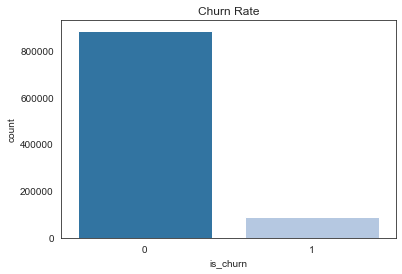

In [57]:
# sns.set_theme(palette='RdYlBu_r''Spectral'RdYlGn,'tab20')
sns.set_style('white')
sns.set_palette('tab20')
ax = sns.countplot(x="is_churn", data=train)
plt.title('Churn Rate');
print('Churn Percentage: ' + str(train['is_churn'].value_counts()[1]/train['is_churn'].count() * 100)+'%')

# Merge train and member

In [35]:
train_members = pd.merge(train, members, on='msno', how='left')

In [36]:
memory_reduce(train_members)

67.59651184082031  MB
45.37300109863281  MB


In [18]:
train_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   msno                          970960 non-null  object 
 1   is_churn                      970960 non-null  int8   
 2   city                          860967 non-null  float32
 3   bd                            860967 non-null  float32
 4   gender                        388905 non-null  object 
 5   registered_via                860967 non-null  float32
 6   registration_init_time        860967 non-null  float32
 7   registration_init_time_year   860967 non-null  float32
 8   registration_init_time_month  860967 non-null  float32
dtypes: float32(6), int8(1), object(2)
memory usage: 45.4+ MB


In [37]:
train_members.describe()

,is_churn,city,bd,registered_via,registration_init_time,registration_init_time_year,registration_init_time_month
count,970960.000000,860967.000000,860967.000000,860967.000000,8.609670e+05,860967.000000,860967.000000
mean,0.089942,5.937295,13.583854,6.892744,1.998306e+07,2023.132568,6.561337
std,0.286099,6.429398,20.118469,1.939130,1.524754e+05,10.375481,3.631725
min,0.000000,1.000000,-3152.000000,3.000000,2.004033e+07,2004.000000,1.000000
25%,0.000000,1.000000,0.000000,7.000000,2.012021e+07,2012.000000,3.000000
50%,0.000000,1.000000,0.000000,7.000000,2.014060e+07,2014.000000,7.000000
75%,0.000000,13.000000,27.000000,9.000000,2.016012e+07,2016.000000,10.000000
max,1.000000,22.000000,2016.000000,13.000000,2.017042e+07,2017.000000,12.000000


In [39]:
train_members.isnull().sum()

msno                                 0
is_churn                             0
city                            109993
bd                              109993
gender                          582055
registered_via                  109993
registration_init_time          109993
registration_init_time_year     109993
registration_init_time_month    109993
dtype: int64

In [42]:
train_members[train_members.city.isnull()]

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_year,registration_init_time_month
28,NTOh3fAZrLoIyE1lxoRpp2lzEraNnnWbUvOhrmO1bUM=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,+wisdxP166qHezQOKLPv4l4AfZClRF3ExWGD2rzYYCU=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,P9FjH43/pjIS6PwcXP8VcA+P4RTq/mH+F3DLuXDpFkE=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Ybp7mbACy/qnytzEr8rZykiEyL23ESsAIZRo17VAT/8=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,r0ND2OhGFAUltb62mwbwM7W9nnI+MMA3IAdBHk3abbI=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
970770,aEGLjh6nXNo+0Ue8zUs6LcBKnk6VvrR2T4e2r8wdJ08=,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970783,WlPu6hRVrpwQHV3TJ3zX/6Vq6yxEptIzUefUBUKOS7I=,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970785,YGWYUW4bxFruhpx9oOgAo0ZNKHGIOZQWeN8GFCCDEOo=,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970890,2dOAfgpGz4Gkh1K2l1QWctIpuvwhrTSYJocqLkfUfCo=,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
train_members.city.isnull().sum()/train_members.shape[0]

0.11328273049353217

In [80]:
train_members.gender.isnull().sum()/train_members.shape[0]

0.5994634176485129

## City

Text(0.5, 1.0, 'Churn Rate City ')

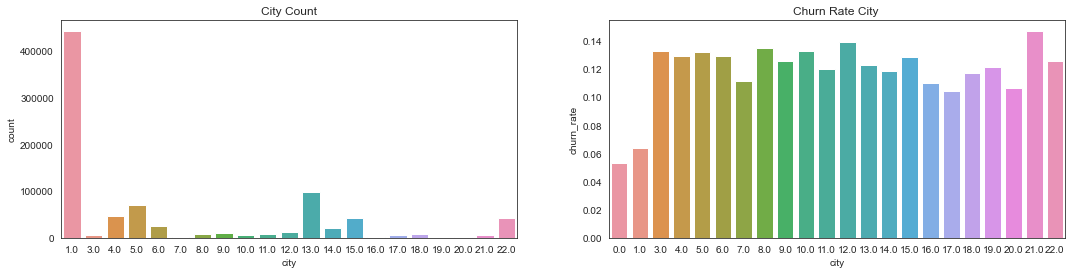

In [20]:
plt.figure(figsize=(18,4))
plt.subplot(121)
ax = sns.countplot(x="city",data=train_members)
plt.title('City Count')
plt.subplot(122)
train_members['city'].fillna(0,inplace=True)
churn_rate=[]
for city in train_members['city'].unique():
    churn_rate.append(sum(train[train_members['city']==city]['is_churn']==1)/sum(train_members['city']==city))
churn_city=pd.DataFrame({'city':train_members['city'].unique(),'churn_rate':churn_rate})
ax = sns.barplot(x='city', y='churn_rate', data=churn_city)
plt.title('Churn Rate City ')

## Age-'bd'

In [21]:
train_members['bd'].describe()

count    860967.000000
mean         13.583854
std          20.118469
min       -3152.000000
25%           0.000000
50%           0.000000
75%          27.000000
max        2016.000000
Name: bd, dtype: float64

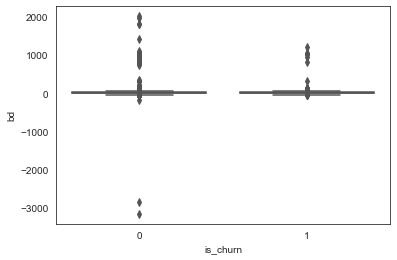

In [22]:
ax=sns.boxplot(x="is_churn", y="bd", data=train_members)

In [79]:
train_members[(train_members.bd>100 )| (train_members.bd<5)].dropna().shape[0]/train_members.bd.dropna().shape[0]

0.013706680976158203

In [54]:
filter_age = train_members[(train_members.bd>8 )& (train_members.bd<85)][['bd','is_churn']].dropna()
filter_age

,bd,is_churn
0,28.0,1
1,20.0,1
2,18.0,1
4,35.0,1
7,28.0,1
...,...,...
970948,19.0,0
970952,23.0,0
970954,25.0,0
970955,28.0,0


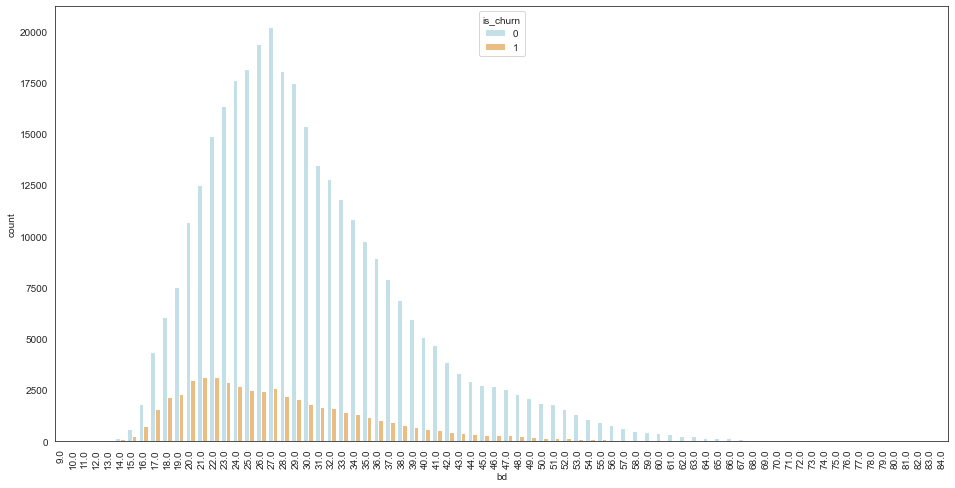

In [73]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ax = sns.countplot(x="bd", hue="is_churn", data=filter_age, palette='RdYlBu_r')


## gender

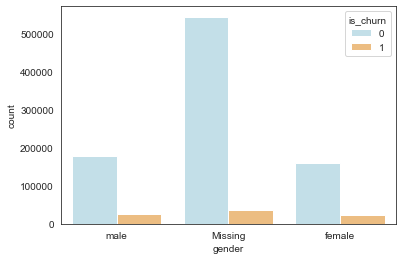

In [84]:
filter_gender=train_members[['gender','is_churn']].fillna('Missing')
ax = sns.countplot(x="gender", hue="is_churn", data=filter_gender, palette='RdYlBu_r')

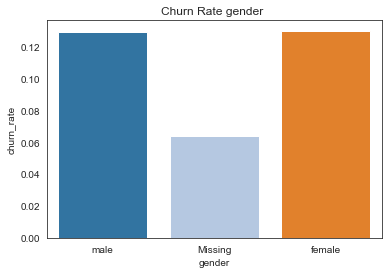

In [89]:
churn_rate=[]
for gender in filter_gender['gender'].unique():
    churn_rate.append(sum(filter_gender[filter_gender['gender']==gender]['is_churn']==1)/sum(filter_gender['gender']==gender))
churn_gender=pd.DataFrame({'gender':filter_gender['gender'].unique(),'churn_rate':churn_rate})
ax = sns.barplot(x='gender', y='churn_rate', data=churn_gender);
plt.title('Churn Rate gender ');

## registered_via

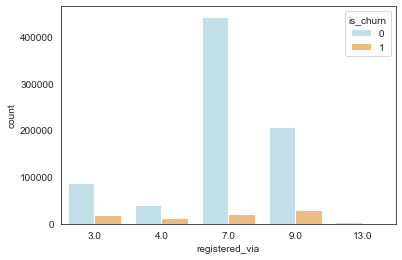

In [88]:
filter_register=train_members[['registered_via','is_churn']].dropna()
ax = sns.countplot(x="registered_via", hue="is_churn", data=filter_register, palette='RdYlBu_r')

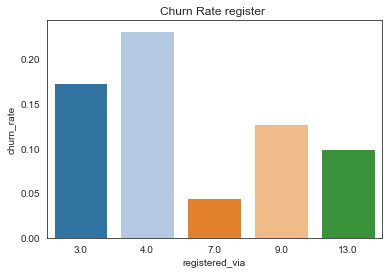

In [92]:
churn_rate=[]
for register in filter_register['registered_via'].unique():
    churn_rate.append(sum(filter_register[filter_register['registered_via']==register]['is_churn']==1)/sum(filter_register['registered_via']==register))
churn_register=pd.DataFrame({'registered_via':filter_register['registered_via'].unique(),'churn_rate':churn_rate})
ax = sns.barplot(x='registered_via', y='churn_rate', data=churn_register);
plt.title('Churn Rate register ');

## registration_init_time

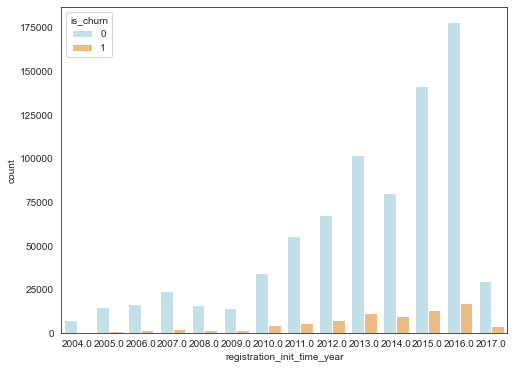

In [99]:
plt.figure(figsize=(8,6))
filter_registration=train_members[['registration_init_time_year','is_churn']].dropna()
ax = sns.countplot(x="registration_init_time_year", hue="is_churn", data=filter_registration, palette='RdYlBu_r')

# Merge train and transaction

In [5]:
train_transaction = pd.merge(train, transactions, on = 'msno', how = 'left')

In [6]:
train_transaction[:10]

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,38,30,149,149,0,20170228,20170330,0
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,31,0,0,149,1,20150331,20150430,0
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,31,0,0,149,1,20150630,20150731,0
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,31,30,149,149,1,20150902,20150901,1
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,31,0,0,149,1,20150831,20150930,0
5,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,31,0,0,149,1,20150731,20150831,0
6,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,38,30,149,149,0,20160303,20160402,0
7,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,35,7,0,0,0,20160724,20160828,0
8,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,38,30,149,149,0,20160722,20160821,0
9,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,36,30,180,180,0,20170210,20170312,0


In [104]:
train_transaction.describe()

,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1.625562e+07,1.625562e+07,1.625562e+07,1.625562e+07,1.625562e+07,1.625562e+07,1.625562e+07,1.625562e+07,1.625562e+07
mean,6.714618e-02,3.914396e+01,3.002938e+01,1.331616e+02,1.374790e+02,9.211069e-01,2.015928e+07,2.016043e+07,1.730454e-02
std,2.502750e-01,3.384228e+00,1.828721e+01,8.143546e+01,7.843278e+01,2.695718e-01,6.675698e+03,7.250781e+03,1.304036e-01
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,0.000000e+00,3.900000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015111e+07,2.015122e+07,0.000000e+00
50%,0.000000e+00,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016061e+07,2.016072e+07,0.000000e+00
75%,0.000000e+00,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016112e+07,2.016123e+07,0.000000e+00
max,1.000000e+00,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.023082e+07,1.000000e+00


In [105]:
train_transaction.isnull().sum()

msno                      0
is_churn                  0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

## payment_plan_days

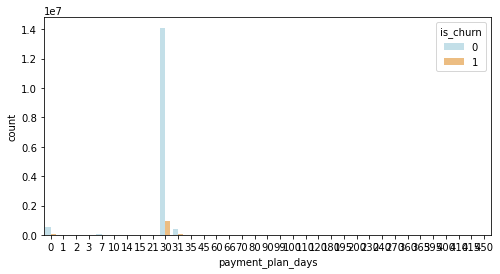

In [7]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="payment_plan_days", hue="is_churn", data=train_transaction, palette='RdYlBu_r')

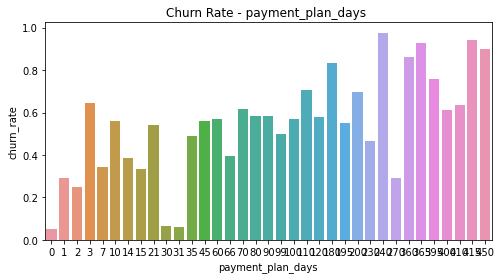

In [9]:
churn_rate=[]
plan_days=[]
oop=0
for plan in train_transaction['payment_plan_days'].unique():
    try:
        churn_rate.append(sum(train_transaction[train_transaction['payment_plan_days']==plan]['is_churn']==1)/sum(train_transaction['payment_plan_days']==plan))
        plan_days.append(plan)
    except:
        oop +=1
churn_method=pd.DataFrame({'payment_plan_days':train_transaction['payment_plan_days'].unique(),'churn_rate':churn_rate})
plt.figure(figsize=(8,4))
ax = sns.barplot(x='payment_plan_days', y='churn_rate', data=churn_method);
plt.title('Churn Rate - payment_plan_days ');

## payment_method_id

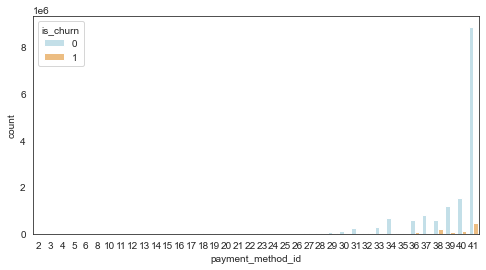

In [110]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="payment_method_id", hue="is_churn", data=train_transaction, palette='RdYlBu_r')

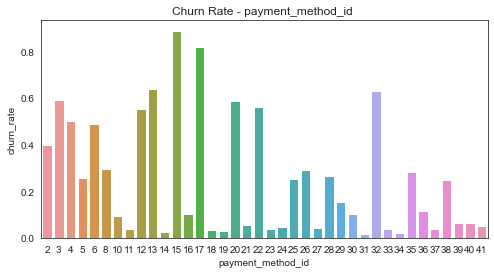

In [134]:
churn_rate=[]
methods=[]
oop=0
for method in train_transaction['payment_method_id'].unique():
    try:
        churn_rate.append(sum(train_transaction[train_transaction['payment_method_id']==method]['is_churn']==1)/sum(train_transaction['payment_method_id']==method))
        methods.append(method)
    except:
        oop +=1
churn_method=pd.DataFrame({'payment_method_id':train_transaction['payment_method_id'].unique(),'churn_rate':churn_rate})
plt.figure(figsize=(8,4))
ax = sns.barplot(x='payment_method_id', y='churn_rate', data=churn_method);
plt.title('Churn Rate - payment_method_id ');

## plan_list_price & actual_amount_paid

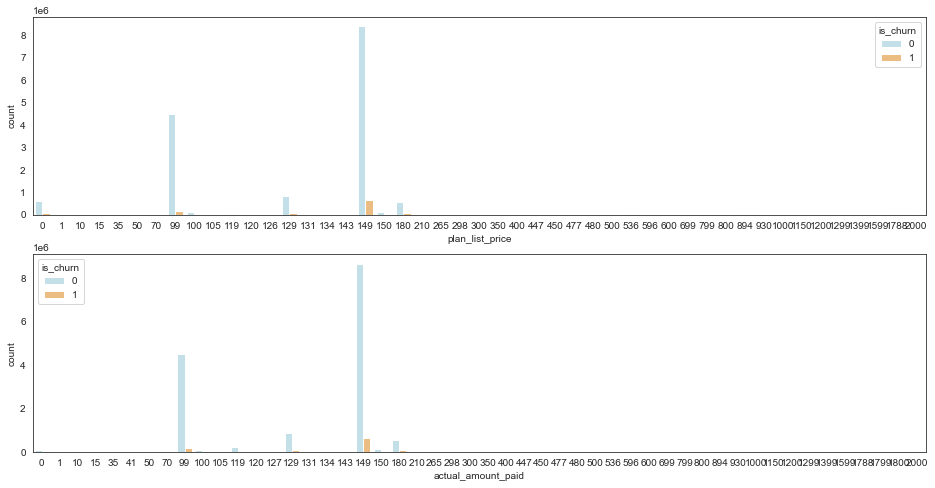

In [116]:
plt.figure(figsize=(16,8))
plt.subplot(211)
ax = sns.countplot(x="plan_list_price", hue="is_churn", data=train_transaction, palette='RdYlBu_r')
plt.subplot(212)
ax = sns.countplot(x="actual_amount_paid", hue="is_churn", data=train_transaction, palette='RdYlBu_r')


In [130]:
is_discount=train_transaction[['is_churn','plan_list_price','actual_amount_paid']]
is_discount['discount']=(train_transaction['plan_list_price']>train_transaction['actual_amount_paid']).astype(int)

0    15971869
1      283753
Name: discount, dtype: int64

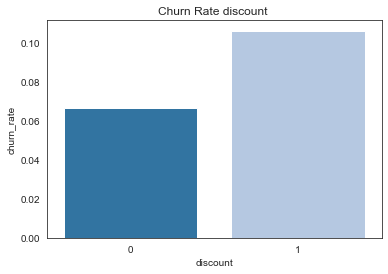

In [133]:
churn_rate=[]
for discount in is_discount['discount'].unique():
    churn_rate.append(sum(is_discount[is_discount['discount']==discount]['is_churn']==1)/sum(is_discount['discount']==discount))
churn_discount=pd.DataFrame({'discount':is_discount['discount'].unique(),'churn_rate':churn_rate})
ax = sns.barplot(x='discount', y='churn_rate', data=churn_discount);
plt.title('Churn Rate discount ');

## is_auto_renew

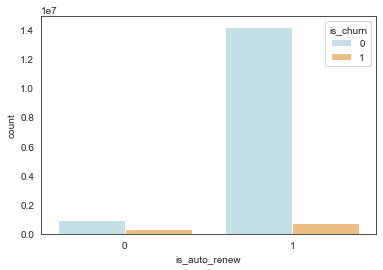

In [136]:
ax = sns.countplot(x="is_auto_renew", hue="is_churn", data=train_transaction, palette='RdYlBu_r')

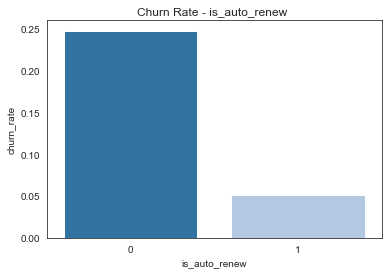

In [138]:
churn_rate=[]
for is_auto_renew in train_transaction['is_auto_renew'].unique():
    churn_rate.append(sum(train_transaction[train_transaction['is_auto_renew']==is_auto_renew]['is_churn']==1)/sum(train_transaction['is_auto_renew']==is_auto_renew))
churn_discount=pd.DataFrame({'is_auto_renew':train_transaction['is_auto_renew'].unique(),'churn_rate':churn_rate})
ax = sns.barplot(x='is_auto_renew', y='churn_rate', data=churn_discount);
plt.title('Churn Rate - is_auto_renew ');

## is_cancel

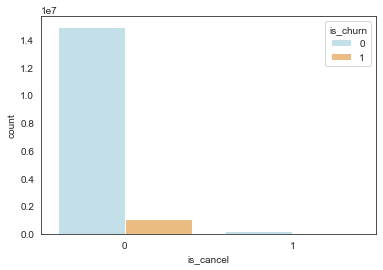

In [140]:
ax = sns.countplot(x="is_cancel", hue="is_churn", data=train_transaction, palette='RdYlBu_r')

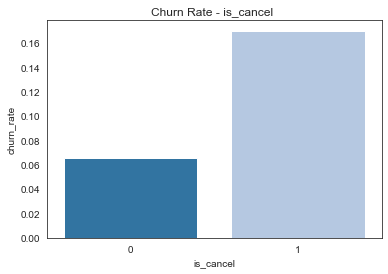

In [139]:
churn_rate=[]
for is_cancel in train_transaction['is_cancel'].unique():
    churn_rate.append(sum(train_transaction[train_transaction['is_cancel']==is_cancel]['is_churn']==1)/sum(train_transaction['is_cancel']==is_cancel))
churn_is_cancel=pd.DataFrame({'is_cancel':train_transaction['is_cancel'].unique(),'churn_rate':churn_rate})
ax = sns.barplot(x='is_cancel', y='churn_rate', data=churn_is_cancel);
plt.title('Churn Rate - is_cancel ');

# User_log dataset

In [219]:
train_userlog = pd.merge(train, user_logs, on = 'msno', how = 'left')

In [66]:
user_logs

NameError: name 'user_logs' is not defined

In [222]:
train_userlog

,msno,is_churn,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.892578
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.432617
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.312988
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.226562
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.109985
...,...,...,...,...,...,...,...,...,...,...
13749348,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0,20170327.0,0.0,0.0,0.0,2.0,11.0,12.0,2815.371094
13749349,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0,20170312.0,0.0,0.0,0.0,1.0,28.0,26.0,6304.000000
13749350,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0,20170330.0,0.0,0.0,0.0,0.0,11.0,7.0,2401.543945
13749351,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0,20170310.0,0.0,0.0,0.0,0.0,1.0,1.0,233.731995


In [223]:
train_userlog.isnull().sum()

msno               0
is_churn           0
date          216409
num_25        216409
num_50        216409
num_75        216409
num_985       216409
num_100       216409
num_unq       216409
total_secs    216409
dtype: int64

In [224]:
train_userlog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13749353 entries, 0 to 13749352
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   msno        object 
 1   is_churn    int8   
 2   date        float64
 3   num_25      float64
 4   num_50      float64
 5   num_75      float64
 6   num_985     float64
 7   num_100     float64
 8   num_unq     float64
 9   total_secs  float32
dtypes: float32(1), float64(7), int8(1), object(1)
memory usage: 1.6+ GB


In [225]:
memory_reduce(train_userlog)

1649.6551713943481  MB
1282.507836341858  MB


In [226]:
train_userlog.dropna(inplace=True)

In [227]:
train_userlog.describe()

,is_churn,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.353294e+07,13532944.0,1.353294e+07,1.353294e+07,1.353294e+07,1.353294e+07,1.353294e+07,1.353294e+07,1.353294e+07
mean,7.954500e-02,17765984.0,5.913228e+00,1.447407e+00,9.225333e-01,1.043397e+00,2.910793e+01,2.786980e+01,7.598934e+03
std,2.705875e-01,2272182.0,1.287455e+01,3.635138e+00,1.773701e+00,2.721740e+00,3.928360e+01,3.134474e+01,9.550359e+03
min,0.000000e+00,20170300.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,0.000000e+00,20170308.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.941920e+03
50%,0.000000e+00,20170316.0,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,1.800000e+01,4.514544e+03
75%,0.000000e+00,20170324.0,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.600000e+01,3.700000e+01,9.693216e+03
max,1.000000e+00,20170332.0,5.213000e+03,8.310000e+02,3.780000e+02,1.010000e+03,9.838000e+03,4.925000e+03,2.307918e+06


## total_secs

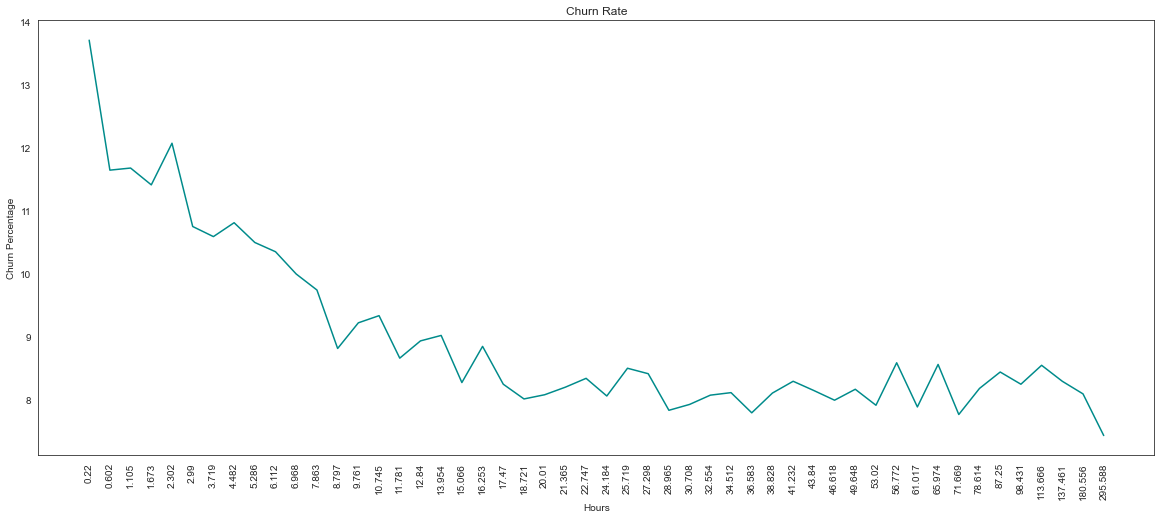

In [228]:
hour_data=train_userlog.groupby('msno').agg({'total_secs':['sum'],'is_churn':['min']})
hour_data.columns=hour_data.columns.droplevel()
hour_data.columns=['total_secs','is_churn']
hour_data['total_hour']=hour_data['total_secs']/3600
sort_hour=np.sort(hour_data['total_hour'].values)
hour_interval=sort_hour[0:len(hour_data['total_hour']):15000]
def churn_rate(hour_small,hour_large):
    churn_num=((hour_data['total_hour']>=hour_small)&(hour_data['total_hour']<hour_large)&(hour_data['is_churn']==1)).sum()
    total_num=((hour_data['total_hour']>=hour_small)&(hour_data['total_hour']<hour_large)).sum()
    return 100*(churn_num/total_num)
CP=[]
bin_names=[]
for i in range(0,len(hour_interval)-1):
    CP.append(churn_rate(hour_interval[i],hour_interval[i+1]))
    bin_names.append(str(round(hour_interval[i+1],3)))
    i = i+1
plt.figure(figsize = (20,8))
plt.xlabel('Hours')
plt.xticks(np.arange(0,len(bins)-1), bin_names, rotation = 90)
plt.ylabel('Churn Percentage')
plt.title('Churn Rate')
plt.plot( np.arange(0,len(bins)-1) , CP, color = 'darkcyan')
plt.show()